# Flight Fare Prediction

# Contents

### 1. [Introduction](#1)
### 2. [Imporing Libraries](#2)
### 3. [Loading the dataset](#3)
### 4. [Data Inspection](#4)
### 5. [Exploratory Data Analysis (EDA)](#5)
### 6. [Feature Engineering](#6)
### 7. [Checking for null values](#7)
### 8. [Using Encoding to handle categorical data](#8)
### 9. [Feature Selection](#9)
### 10. [Building Machine Learning models](#10)
### 11. [Hyperparameter](#11)
### 12. [Conclusion](#12)
### 13. [Saving the model in pickle format](#13)

<a name=1></a>
# 1. Introduction
- Problem Statement 

<ul><li>Flight ticket prices can be hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. <br> We might have often heard travellers saying that flight ticket prices are so unpredictable.</li>

<li>I worked on this ML problem statement and came up with a model which predicts the price of Flight tickets based on some independent Features. </li>
<li>This dataset comprises of Flight ticket Prices taken from Kaggle website</li>
<li>Link of the dataset:- <a href="https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh">https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh</a></li>
    
<li>This dataset has prices of flight tickets for various airlines between the months of March and June of 2019 for various cities. </li>

<li>Size of training set: 10683 records</li>
<li>Size of test set: 2671 records</li>
<b>Use cases </b>
<li>Prediction result can be useful for travellers to make informed decisions about their travel. </li>
<li>On the other hand, airlines can make use of this technology to forecast rates of competitors and adjust their pricing strategies accordingly to find out the optimal price they should set to maximize revenue while remaining competitive. </li>
</ul>

<a name= 2></a>
# 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<a name= 3></a>
# 3. Loading Flight Fare Data

In [2]:
Train_data = pd.read_excel("datasets/Data_Train.xlsx")
Test_data = pd.read_excel("datasets/Test_set.xlsx")
# Concatenate the DataFrames
flight_df = pd.concat([Train_data, Test_data], ignore_index=True)
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


<a name= 4></a>
# 4.Data Inspection

Shape of the dataset

In [3]:
flight_df.shape

(13354, 11)

Summary of the dataset

In [4]:
flight_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Since this dataset has only 1 numerical column, dscribe() will display summery statistics only for the "Price" column.

In [5]:
# information about the data, and checking datatypes

flight_df.info()
flight_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

<a name=5></a>
# 5. Exploratory Data Analysis(EDA)

**Bar Chart showing top 10 most preferred Airlines**

<Figure size 1920x1440 with 0 Axes>

findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.
findfont: Font family 'times new romam' not found.


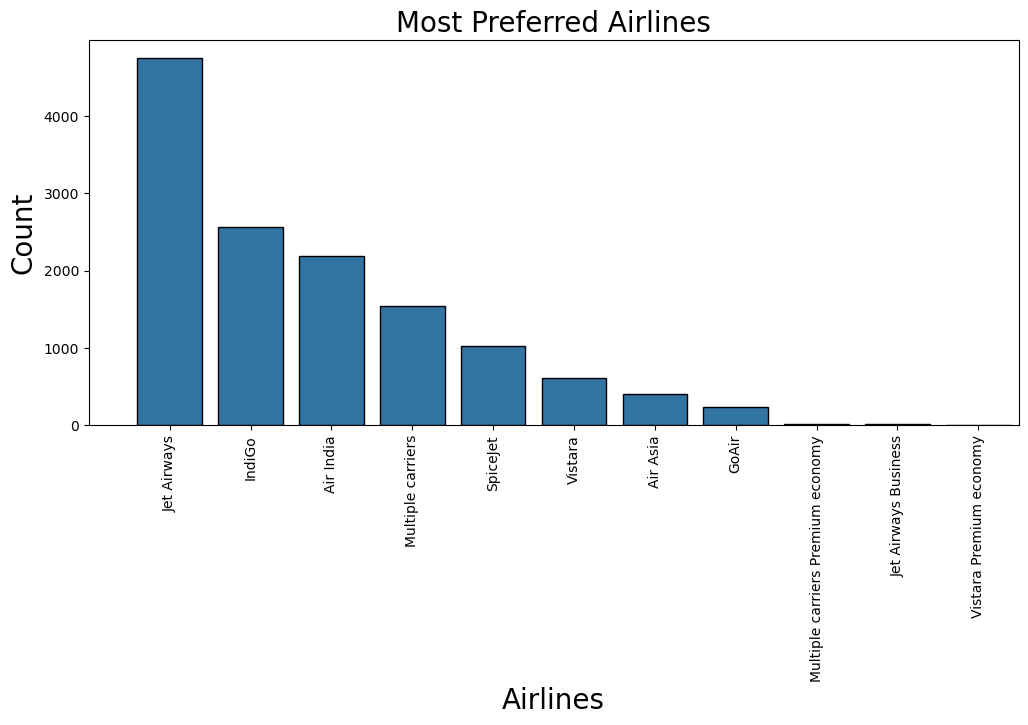

In [6]:
plt.figure(dpi=300)
plt.figure(figsize=(12,5))
sns.countplot(x="Airline",data=flight_df, order=flight_df['Airline'].value_counts().index, ec='black')
font_style = {'family':'times new romam', 'size':20, 'color':'black'}
plt.title("Most Preferred Airlines", fontdict=font_style)
plt.ylabel("Count", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.xlim(-1, 10.5)
plt.show()

<h4>Insights</h4>
<ul><li>Most preferred Airline is "Jet Airways"</li>
<li>Of all the total flight tickets sold, Jet Airways has the highest share followed by Indigo .</li></ul>

# Airlines Vs Flight ticket Price

In [7]:
airlines = flight_df.groupby('Airline').Price.max()
airlines_df = airlines.to_frame().sort_values('Price', ascending=False)[0:10]
airlines_df

,Price
Airline,
Jet Airways Business,79512.0
Jet Airways,54826.0
Multiple carriers,36983.0
Air India,31945.0
SpiceJet,23267.0
GoAir,22794.0
IndiGo,22153.0
Vistara,21730.0
Multiple carriers Premium economy,14629.0


<Figure size 1920x1440 with 0 Axes>

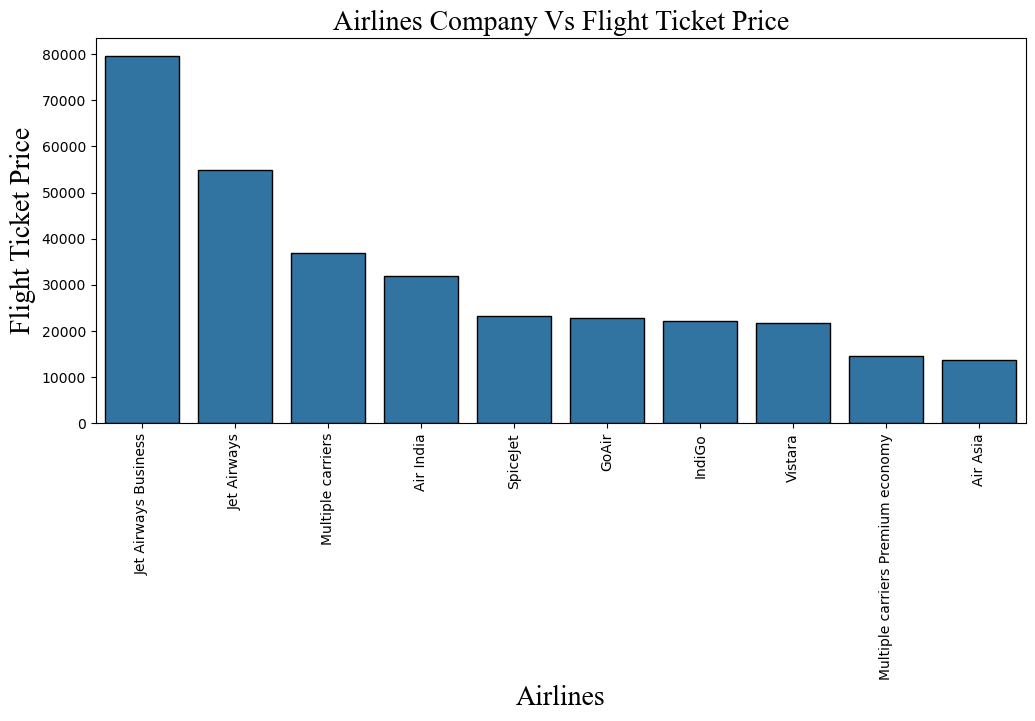

In [8]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(x=airlines_df.index, y = airlines_df['Price'],ec="black")
font_style = {"family":"times new roman", 'size':20,'color':'black'}
plt.title("Airlines Company Vs Flight Ticket Price", fontdict=font_style)
plt.ylabel("Flight Ticket Price", fontdict=font_style)
plt.xlabel("Airlines", fontdict=font_style)
plt.xticks(rotation=90)
plt.show()

<h4>Insights</h4>
<ul><li> "Jet Airways Business" tickets are the most expensive ones.</li></ul>

<a name= 6></a>
# 6. Feature Engineering

## Cleaning the Data

In [9]:
flight_df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0


**Extracting day, month, year from Date_of_Journey feature and store them in new columns.**

In [10]:
flight_df["Journey_date"] = flight_df["Date_of_Journey"].str.split("/").str[0].astype(int)
flight_df["Journey_month"] = flight_df["Date_of_Journey"].str.split("/").str[1].astype(int)
flight_df["Journey_year"] = flight_df["Date_of_Journey"].str.split("/").str[2].astype(int)

In [11]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [12]:
# Now Date_of_Journey column is no longer required, so we can drop it
flight_df = flight_df.drop(["Date_of_Journey"], axis=1)

In [13]:
flight_df["Journey_year"].unique()

array([2019])

In [14]:
# Droping Journey_year column, because all dat is from 2019
flight_df = flight_df.drop(['Journey_year'],axis=1)
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3


## Cleaning Total_Stops column

In [15]:
flight_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [16]:
# Removing stop words from both non-stop as well as perticularstops
flight_df['Total_Stops'] = flight_df['Total_Stops'].str.split(" ").str[0]

In [17]:
# Replacing "non-stop" word with 0
flight_df["Total_Stops"] = flight_df['Total_Stops'].replace("non-stop", "0")

In [18]:
flight_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897.0,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662.0,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882.0,9,6


## Cleaning Time Columns from Dataset

### Cleaning Arrival_Time Columns

In [19]:
flight_df["Arrival_Time"] = flight_df["Arrival_Time"].str.split(" ").str[0]
flight_df['Arrival_hour'] = flight_df["Arrival_Time"].str.split(":").str[0].astype(int)
flight_df["Arrival_min"] = flight_df["Arrival_Time"].str.split(":").str[1].astype(int)

In [20]:
flight_df= flight_df.drop(["Arrival_Time"], axis=1)

### Cleaning Depature time (Dep_Time) Columns

In [21]:
flight_df["Dep_hour"] = flight_df["Dep_Time"].str.split(":").str[0].astype(int)
flight_df["Dep_min"] = flight_df["Dep_Time"].str.split(":").str[1].astype(int)
flight_df = flight_df.drop(["Dep_Time"], axis = 1)

In [22]:
flight_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882.0,9,6,4,25,9,25


### Route column :

- The Route column tells about journey's path
- Route column can be removed because 'Total_Stops' field has already captured this value and both are related.

In [23]:
flight_df.drop(["Route"], axis=1, inplace = True)

### Additional_Info Column :

In [24]:
flight_df["Additional_Info"].value_counts()

Additional_Info
No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: count, dtype: int64

- 'Additional_Info' column can be dropped since more than 70% of them have no information

In [25]:
flight_df.drop(["Additional_Info"], axis=1, inplace=True)

In [26]:
flight_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2,13882.0,9,6,4,25,9,25


### Cleaning Duration column
* Extracting hours and min from Duration feature
* Converting hours to min and find total duration in minutes to make it single column. 

In [27]:
flight_df["Duration_hr"] = flight_df["Duration"].str.split('h').str[0]
flight_df["Duration_hr"].str.contains('m').sum()

2

In [28]:
flight_df[flight_df['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hr
6474,Air India,Mumbai,Hyderabad,5m,2,17327.0,6,3,16,55,16,50,5m
13343,Air India,Mumbai,Hyderabad,5m,2,NaN,12,3,16,55,16,50,5m


In [29]:
flight_df["Duration_hr"] = flight_df["Duration_hr"].replace("5m","0")

In [30]:
flight_df["Duration_min"]=flight_df["Duration"].str.split(' ').str[1].str.split('m').str[0]
flight_df['Duration_min'].fillna("0",inplace=True)
flight_df["Duration"]=(flight_df["Duration_hr"].astype(int)*60) + flight_df["Duration_min"].astype(int)
flight_df=flight_df.drop(['Duration_hr','Duration_min'],axis=1)
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25
3,IndiGo,Kolkata,Banglore,325,1,6218.0,12,5,23,30,18,5
4,IndiGo,Banglore,New Delhi,285,1,13302.0,1,3,21,35,16,50


<a name= 7></a>
# 7. Checking for null values

In [31]:
flight_df.isnull().sum()

Airline             0
Source              0
Destination         0
Duration            0
Total_Stops         1
Price            2671
Journey_date        0
Journey_month       0
Arrival_hour        0
Arrival_min         0
Dep_hour            0
Dep_min             0
dtype: int64

### Handling Null Values in 'Total_Stops' column

In [32]:
flight_df["Total_Stops"].value_counts()

Total_Stops
1    7056
0    4340
2    1899
3      56
4       2
Name: count, dtype: int64

- '1' is most frequently occuring  value. So fill Total_Stops columns null values by '1'

In [33]:
flight_df["Total_Stops"] = flight_df["Total_Stops"].fillna('1')
flight_df["Total_Stops"] = flight_df["Total_Stops"].astype(int)

### Handling Null Values in 'Price' Column

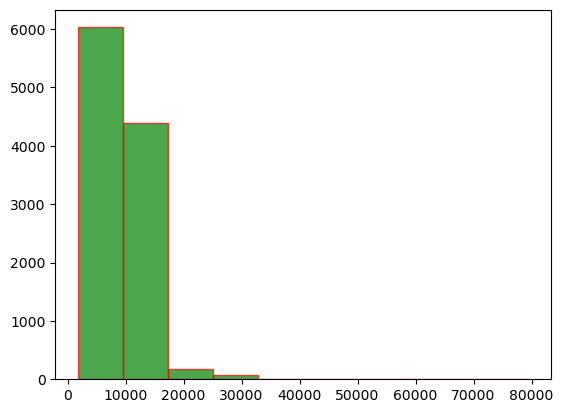

In [34]:
plt.hist(flight_df.Price, color="green",edgecolor='red', alpha=0.7)
plt.show()

In [35]:
flight_df.Price.mean()

9087.064120565385

In [36]:
flight_df.Price.median()

8372.0

In [37]:
flight_df["Price"].fillna(flight_df["Price"].mean(), inplace = True)
flight_df.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,170,0,3897.0,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,445,2,7662.0,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,1140,2,13882.0,9,6,4,25,9,25


In [38]:
flight_df.isnull().sum()

Airline          0
Source           0
Destination      0
Duration         0
Total_Stops      0
Price            0
Journey_date     0
Journey_month    0
Arrival_hour     0
Arrival_min      0
Dep_hour         0
Dep_min          0
dtype: int64

In [39]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Airline        13354 non-null  object 
 1   Source         13354 non-null  object 
 2   Destination    13354 non-null  object 
 3   Duration       13354 non-null  int32  
 4   Total_Stops    13354 non-null  int32  
 5   Price          13354 non-null  float64
 6   Journey_date   13354 non-null  int32  
 7   Journey_month  13354 non-null  int32  
 8   Arrival_hour   13354 non-null  int32  
 9   Arrival_min    13354 non-null  int32  
 10  Dep_hour       13354 non-null  int32  
 11  Dep_min        13354 non-null  int32  
dtypes: float64(1), int32(8), object(3)
memory usage: 834.8+ KB


<a name= 8></a>
# 8. Using Encoding to handle categorical data 

Features with Categorical data:
- Airline
- Source
- Destination

Applying Label Encoder to these features.

In [40]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

for i in ["Airline","Source","Destination"]:
    flight_df[i] = la.fit_transform(flight_df[i])
flight_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_date,Journey_month,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,3,0,5,170,0,3897.0,24,3,1,10,22,20
1,1,3,0,445,2,7662.0,1,5,13,15,5,50
2,4,2,1,1140,2,13882.0,9,6,4,25,9,25
3,3,3,0,325,1,6218.0,12,5,23,30,18,5
4,3,0,5,285,1,13302.0,1,3,21,35,16,50


<a name= 9></a>
# 9. Feature Selection
- Finding out the best feature which will contribute and have good relation with the target variable(Price)
- Let's use heat map to find correlation between features.

<Figure size 1920x1440 with 0 Axes>

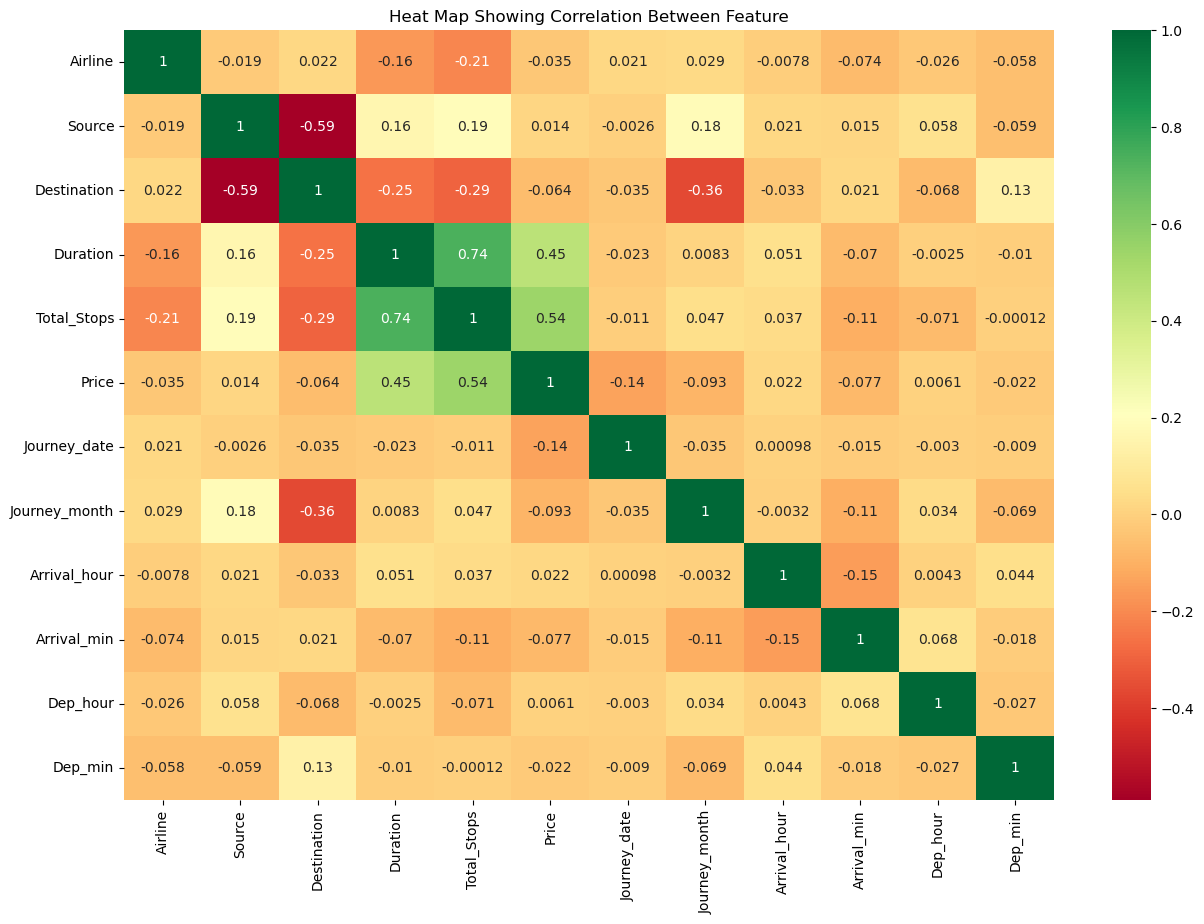

In [41]:
plt.figure(dpi=300)
plt.figure(figsize=(15,10))
sns.heatmap(flight_df.corr(), annot=True, cmap='RdYlGn')
plt.title("Heat Map Showing Correlation Between Feature")
plt.show()

## There is a high correlation between:
- Duration & Total Stops
- Price & Total Stops
- Price & Flight Duration

<a name=10></a>
# 10. Building Machine Learning Models

For predicting the price, we build 3 model using the following algorithms:
- K neighbors Regression
- Decision Tree Regression
- Random Forest Regression
<br></br>
- Compare the accuracies got from these 3 model and select the best model.
- Apply Hyperparameter tuning  to increase its efficiency

In [42]:
# Splitting data into x and y
train_df=flight_df[0:10683]
test_df = flight_df[10683:]
x = train_df.drop(["Price"],axis=1)
y = train_df.loc[:,["Price"]].values

# spiliting the dataset into train data and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Impoting Models

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Function to train the models

In [44]:
def predict(algorithm):
    
    print("Algorithm:", algorithm)
    model = algorithm.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("The Predicted Price values are: ", y_pred)
    print("\n")
    
    r2 = r2_score(y_test, y_pred)
    print("r2 Score: ",r2)
    print("\n")
    
    print('MAE:', (mean_absolute_error(y_test, y_pred)))
    print('MSE:',(mean_squared_error(y_test, y_pred)))
    return(r2)
    

In [45]:
knn = predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
The Predicted Price values are:  [[ 8399.4]
 [ 3843.4]
 [10933. ]
 ...
 [14808.8]
 [ 6443.2]
 [ 6902.4]]


r2 Score:  0.5877402465573127


MAE: 1769.717334331711
MSE: 8589446.182089105


In [46]:
dt = predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
The Predicted Price values are:  [ 7048.  3857. 10991. ... 14441.  7229.  5842.]


r2 Score:  0.6197842232963902


MAE: 1438.582753026332
MSE: 7921808.821512543


In [47]:
rf = predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
The Predicted Price values are:  [ 7006.21        3833.71516667 11682.9        ... 14292.34933333
  6858.689       6118.83      ]


r2 Score:  0.7987809179869807


MAE: 1188.694670399622
MSE: 4192406.5139200683


In [48]:
# Storing the accuracies of these 3 model in a dataframe

score_df = pd.DataFrame({'Model': ['K-Nearest Neighbour',
                                   'Decision Tree',
                                   'Random Forest'],
                         'Accuracy': [knn*100, dt*100, rf*100]})
score_df

,Model,Accuracy
0,K-Nearest Neighbour,58.774025
1,Decision Tree,61.978422
2,Random Forest,79.878092


<br></br>
- The **Random Forest Regression model** turned out to be the most accurate one out of 3 models.
- Let's try to imporve the accuracy by doing Hyperparameter.

<a name=11></a>
# 11. Hyperparameter Tunning

<br></br>

### Applying Random Search to find the best parameters

In [49]:
from sklearn.model_selection import RandomizedSearchCV

random_search = {
    'n_estimators' : [100, 120, 150, 180, 200, 220, 250],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [5, 10, 15, 20],
    'min_samples_split' : [2, 5, 10, 15, 100],
    'min_samples_leaf' : [1, 2, 5, 10]
}

rf_regressor = RandomForestRegressor()

rf_model = RandomizedSearchCV(
    estimator=rf_regressor, 
    param_distributions=random_search,
    cv=3, n_jobs=-1, verbose=2, random_state=0
)

rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [50]:
# Best Parameter
rf_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [51]:
# Predicting the values

pred = rf_model.predict(x_test)
r2_score(y_test,pred)

0.8088528558268104

<br></br>
### After Hypertuning, the accuracy increases

In [52]:
print('r2_score: ',r2_score(y_test, pred))
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred)))

r2_score:  0.8088528558268104
MAE:  1237.6522206850402
MSE:  3982557.341639437
RMSE:  1995.6345711676365


<br></br>
For Random Forest Regressor,
- Before hyper tunning, R2 Score = 79 %
- After hyper tuning, R2 Score = 82 %
- The value of MAE drops as well, indicating that we are successful in tunning our model

<a name=12></a>
# 12. Conclusion:

- We have used random forest regressor for training the model and improved its accuracy by doing hyperparameter tuning.
<br></br>
- As a result, we have traind our **Random Forest Regression model,** to forecast dares of flight tickets, with an R2 score of 82 %

<a name=13></a>
# 13. Saving the model in pickle format

In [53]:
import pickle
file = open('flight_model.pkl','wb')
pickle.dump(rf_model, file)

In [54]:
model = open('flight_model.pkl', 'rb')
forest = pickle.load(model)

In [55]:
result = forest.predict(x_test)
print("The predicted prices are: ", result)
print("r2_score = ",r2_score(y_test, result))

The predicted prices are:  [ 7009.43776609  3947.81820539 11568.4543165  ... 14292.88912206
  6350.3219495   7158.06033187]
r2_score =  0.8088528558268104


# Thank You